In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

dict_models = {'Gaussian NB':GaussianNB(),
              'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
              'LogisticRegression':LogisticRegression(max_iter=1000, random_state=42),
              'MLPClassifier':MLPClassifier(max_iter=1000, random_state=42),
              'RandomForestClassifier':RandomForestClassifier(random_state=42),
              'AdaBoostClassifier':AdaBoostClassifier(random_state=42)}

In [129]:
#Define which database to analyze in "name = ":
#stroke, diabetes or hypertension
name = "diabetes"

df = pd.read_csv("data/"+ name+"_data.csv")

names_dict = {"diabetes": "Diabetes", "stroke": "stroke", "hypertension": "target"}

variable = names_dict[name]
print(variable)

Diabetes


In [130]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [131]:
df = df.dropna(axis=0)

In [132]:
X = df.drop(columns=[variable])
y = df[variable]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracies = {}
con_mat = {}

for model in dict_models:
    dict_models[model].fit(X_train, y_train)
    pred = dict_models[model].predict(X_test)
    accuracies[model] = accuracy_score(y_test, pred)
    con_mat[model] = confusion_matrix(y_test, pred)

best_accuracy = max(accuracies)

#best accuracy model:

print(best_accuracy + " : " + str(accuracies[best_accuracy]))


RandomForestClassifier : 0.7253437446952979


### However, having the best accuracy does not mean that it is the best model, let us look at the predictions in a heatmap:

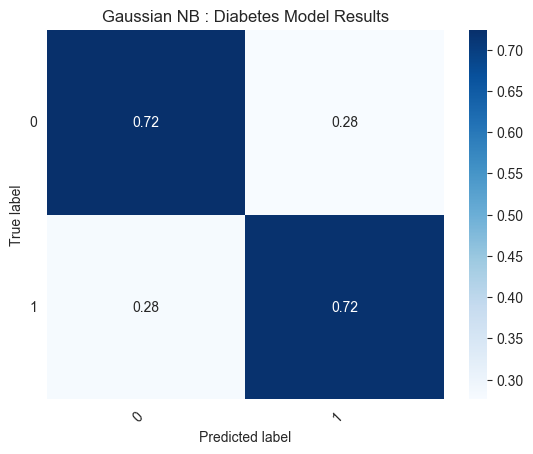

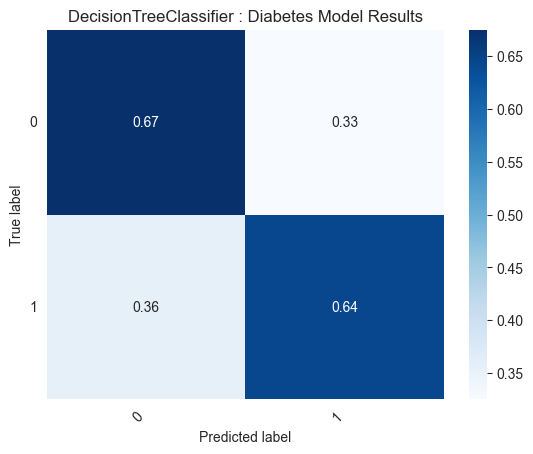

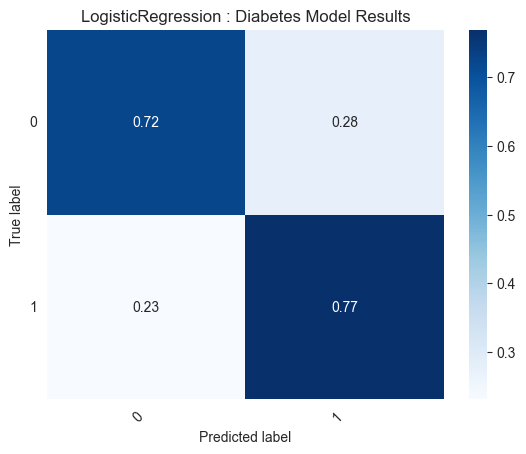

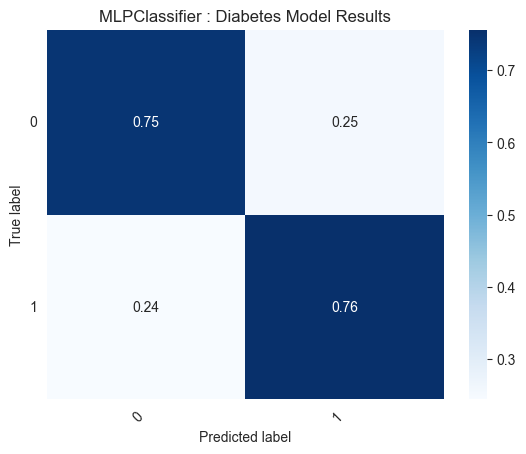

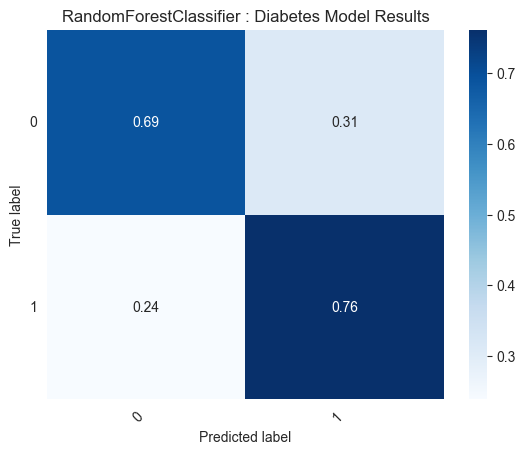

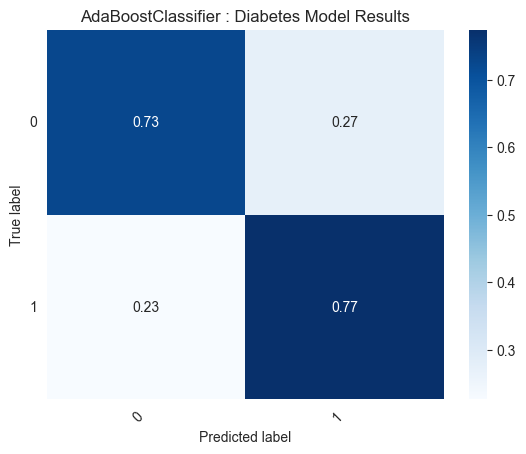

In [135]:
avg_dict = {}

for key in con_mat:

    plt.figure()

    df_cm = con_mat[key].astype('float') / con_mat[key].sum(axis=1)[:, np.newaxis]

    avg = (df_cm[0, 0] + df_cm[1, 1]) / 2

    avg_dict[key] = avg

    heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

    plt.title(key + " : "'Diabetes Model Results')

    plt.show()

In [136]:
print("The best model for "+ name +" prediction would be " + str(max(avg_dict, key=avg_dict.get)) + " with a success rate average of " + str(round(avg_dict[str(max(avg_dict, key=avg_dict.get))] * 100, 2)) + "%")

The best model for diabetes prediction would be MLPClassifier with a success rate average of 75.07%
